In [8]:
# Imports
# if any package errors out, install it using pip install <package name>
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import sdeint
# from pactools import Comodulogram, REFERENCES
# from pactools import simulate_pac

from src import ParameterSet
from src import ModelBase as Model
# np.seterr(all='raise')


In [9]:


def solve(f, g, y0: np.array, t: np.array):
    y = sdeint.itoint(f, g, y0, t)
    # return y
    def toState(y): return Model().deserialize(y)
    return list(map(toState, y))


def run(t_end, dt=0.001):
    print(f'estimated time: {1.1 * t_end/dt / 1000} seconds')
    t = np.linspace(0, t_end, int(t_end / dt) + 1)
    y0 = Model()
    y0.initialize()
    params = ParameterSet("structure.json")
    sigma = y0.serialize_g(params)
    g_vector = sigma * params.constants.tau_y
    print(g_vector)

    def model_f(y, t):
        Y = Model().deserialize(y)
        delta = Y.calcDelta(t, params)
        return delta.serialize()

    def model_g(y, t):
        # Y = MyState().deserialize(y)
        # sigma = Y.serialize_g(params)
        # tau_y = params.constants.tau_y
        # g = sigma * tau_y
        return np.diag(g_vector)

    res = sdeint.itoint(model_f, model_g, y0.serialize(), t)
    def toState(y): return Model().deserialize(y)
    return t, list(map(toState, res))


In [10]:
exc1_r = np.array([x.exc1.r for x in res])
exc2_r = np.array([x.exc2.r for x in res])
pv_r = np.array([x.pv.r for x in res])
plt.plot(t, exc1_r)
plt.plot(t, exc2_r)
plt.plot(t, pv_r)

NameError: name 'res' is not defined

In [ ]:
p = ParameterSet("structure.json")

In [ ]:
s=p.__flat_json__(ignore_zeros=True)
import json
with open('data.json','w') as f:
    f.write(json.dumps(s))

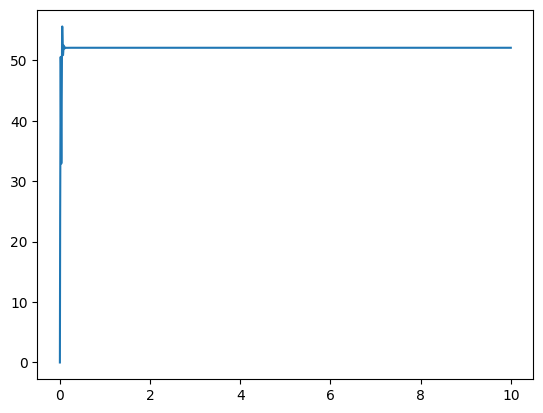

In [6]:
import json
with open('results.json','r') as f:
    d=json.load(f)

plt.plot(d['t'],d['exc1_r'])

In [5]:
d

{'t': [0.0,
  0.001,
  0.002,
  0.003,
  0.004,
  0.005,
  0.006,
  0.007,
  0.008,
  0.009000000000000001,
  0.01,
  0.011,
  0.012,
  0.013000000000000001,
  0.014,
  0.015,
  0.016,
  0.017,
  0.018000000000000002,
  0.019,
  0.02,
  0.021,
  0.022,
  0.023,
  0.024,
  0.025,
  0.026000000000000002,
  0.027,
  0.028,
  0.029,
  0.03,
  0.031,
  0.032,
  0.033,
  0.034,
  0.035,
  0.036000000000000004,
  0.037,
  0.038,
  0.039,
  0.04,
  0.041,
  0.042,
  0.043000000000000003,
  0.044,
  0.045,
  0.046,
  0.047,
  0.048,
  0.049,
  0.05,
  0.051000000000000004,
  0.052000000000000005,
  0.053,
  0.054,
  0.055,
  0.056,
  0.057,
  0.058,
  0.059000000000000004,
  0.06,
  0.061,
  0.062,
  0.063,
  0.064,
  0.065,
  0.066,
  0.067,
  0.068,
  0.069,
  0.07,
  0.07100000000000001,
  0.07200000000000001,
  0.073,
  0.074,
  0.075,
  0.076,
  0.077,
  0.078,
  0.079,
  0.08,
  0.081,
  0.082,
  0.083,
  0.084,
  0.085,
  0.08600000000000001,
  0.08700000000000001,
  0.088,
  0.089,
  0.